# Script to plot results:

### Predictions vs. experimentally-inferred values for the Conv-cGAN and CNN 

This notebook plots the results shown in Figures 3, 7, and 9 of the manuscript

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
# set up parameters for plotting
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
    
plt.rcParams['font.family'] = "Bitstream Vera Serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)            # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Results for Conv-cGAN ( $B_Z=150$ mT and  $B_Z=100$ mT )

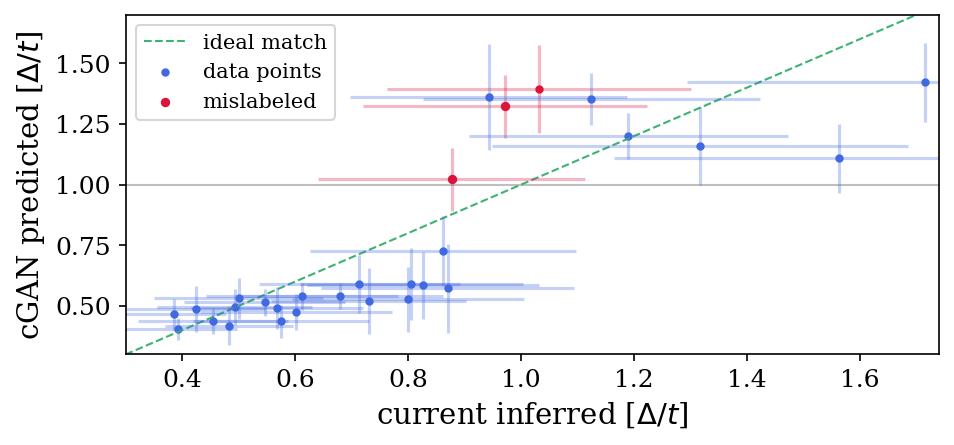

In [3]:
# import data - Conv-cGAN for B_Z = 150 mT 
data_cGAN_uniform = np.loadtxt('results/cGAN_150mT', delimiter='\t')

# data
y2 = data_cGAN_uniform[:,2]
y_uniform = data_cGAN_uniform[:,0]

# mislabeled
y1_misslabeled = y_uniform[20:22]
y2_misslabeled = y2[20:22]

# errors
yerr1 = data_cGAN_uniform[:,1]
yerr2 = data_cGAN_uniform[:,3]

x_grid = np.linspace(0.3,1.7,100)
fig, ax = plt.subplots(dpi=150,figsize=[7,3])
ax = plt.gca() 
ax.plot(x_grid,x_grid, color='mediumseagreen', lw=1.0, ls="--", label = 'ideal match')
ax.axhline(y=1,color='grey', lw=1.,alpha=0.5)#, label='sweet spot')
ax.errorbar(y2[:20], y_uniform[:20], marker='.', xerr = yerr2[:20] , yerr = yerr1[:20], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.3)
ax.errorbar(y2[20:22], y_uniform[20:22], marker='.', xerr = yerr2[20:22], yerr = yerr1[20:22], fmt='None', color='crimson', ecolor='crimson', alpha=0.3)
ax.errorbar(y2[22:24], y_uniform[22:24], marker='.', xerr = yerr2[22:24] , yerr = yerr1[22:24], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.3)
ax.errorbar(y2[24], y_uniform[24], marker='.', xerr = yerr2[24], yerr = yerr1[24], fmt='None', color='crimson', ecolor='crimson', alpha=0.3)
ax.errorbar(y2[25:29], y_uniform[25:29], marker='.', xerr = yerr2[25:29] , yerr = yerr1[25:29], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.3)
ax.scatter(y2[:20], y_uniform[:20], marker='.', color="royalblue", label = 'data points', lw=1.)
ax.scatter(y2[22:24], y_uniform[22:24], marker=".", color="royalblue", lw=1.)
ax.scatter(y2[24], y_uniform[24], marker=".", color="crimson", lw=1.)
ax.scatter(y2_misslabeled, y1_misslabeled, marker=".", color="crimson", label = 'mislabeled', lw=1.5)
ax.scatter(y2[25:29], y_uniform[25:29], marker=".", color="royalblue", lw=1.)
plt.legend()
ax.set_xlabel('current inferred [$\Delta / t$]')
ax.set_ylabel('cGAN predicted [$\Delta / t$]')
ax.set_xlim(0.3,1.74)
ax.set_ylim(0.3,1.7)
plt.show()

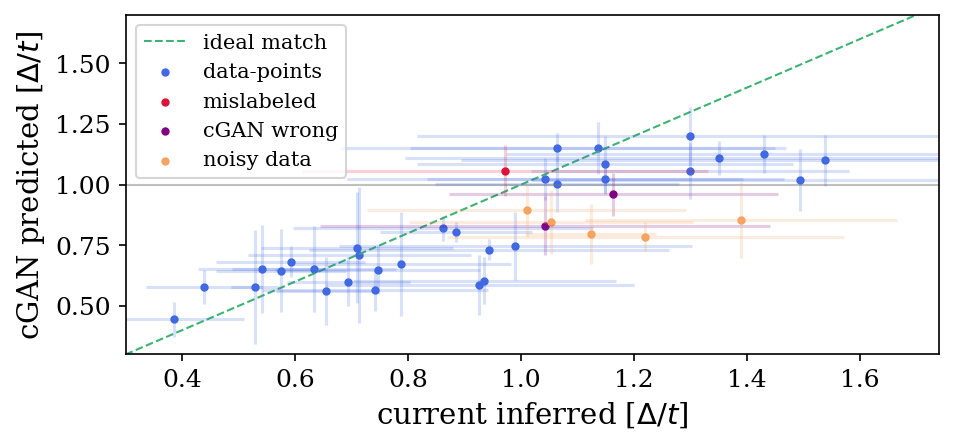

In [4]:
# import data - Conv-cGAN for B_Z = 100 mT 
data_cGAN = np.loadtxt('results/cGAN_100mT', delimiter='\t')

# errors
yerr1 = data_cGAN[:,0]
xerr1 = data_cGAN[:,4] 

# data
x_good = data_cGAN[0:13,3]
y_good = data_cGAN[0:13,1]
x_noisy = data_cGAN[13:19,3]
y_noisy = data_cGAN[13:19,1]
x_very_noisy = data_cGAN[19:33,3]
y_very_noisy = data_cGAN[19:33,1]
x_wrong = data_cGAN[33:,3]
y_wrong = data_cGAN[33:,1]

x_grid = np.linspace(0.3,1.7,100)
fig, ax = plt.subplots(dpi=150,figsize=[7,3])
ax = plt.gca() 
ax.plot(x_grid,x_grid, color='mediumseagreen', lw=1.0, ls="--", label = 'ideal match')
ax.axhline(y=1,color='grey', lw=1.,alpha=0.5)#, label='sweet spot')
ax.errorbar(x_good, y_good, marker='.', xerr = xerr1[:13]  , yerr = yerr1[:13], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.2)
ax.scatter(x_good, y_good, marker=".", color="royalblue", label="data-points")
ax.errorbar(x_noisy, y_noisy, marker='.', xerr = xerr1[13:19]  , yerr = yerr1[13:19], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.2)
ax.scatter(x_noisy, y_noisy, marker=".", color="royalblue")
ax.errorbar(x_very_noisy, y_very_noisy, marker='.', xerr = xerr1[19:33]  , yerr = yerr1[19:33], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.2)
ax.scatter(x_very_noisy, y_very_noisy, marker=".", color="royalblue")
ax.errorbar(x_wrong[0:1], y_wrong[0:1], marker='.', xerr = xerr1[33:34]  , yerr = yerr1[33:34], fmt='None', color='crimson', ecolor='crimson', alpha=0.2)
ax.scatter(x_wrong[0:1], y_wrong[0:1], marker=".", color="crimson", label="mislabeled")
ax.errorbar(x_wrong[1:3], y_wrong[1:3], marker='.', xerr = xerr1[34:36]  , yerr = yerr1[34:36], fmt='None', color='purple', ecolor='purple', alpha=0.2)
ax.scatter(x_wrong[1:3], y_wrong[1:3], marker=".", color="purple", label="cGAN wrong")
ax.errorbar(x_wrong[3:], y_wrong[3:], marker='.', xerr = xerr1[36:]  , yerr = yerr1[36:], fmt='None', color='sandybrown', ecolor='sandybrown', alpha=0.2)
ax.scatter(x_wrong[3:], y_wrong[3:], marker=".", color="sandybrown", label="noisy data")
plt.legend()
ax.set_xlabel('current inferred [$\Delta / t$]')
ax.set_ylabel('cGAN predicted [$\Delta / t$]')
ax.set_xlim(0.3,1.74)
ax.set_ylim(0.3,1.7)
plt.show()

## Results for CNN ( $B_Z=150$ mT and  $B_Z=100$ mT )

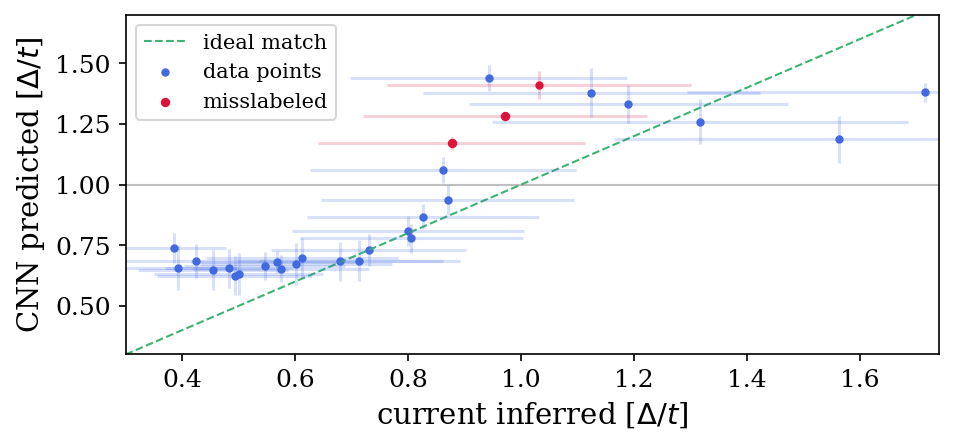

In [5]:
# import data - Zeeman field = 150 mT
data_cGAN_uniform = np.loadtxt('results/CNN_150mT', delimiter='\t')

# data
y2 = data_cGAN_uniform[:,3]
y_uniform = data_cGAN_uniform[:,0]

# misslabeled
y1_misslabeled = y_uniform[20:22]
y2_misslabeled = y2[20:22]

# errors
yerr1 = data_cGAN_uniform[:,1]
yerr2 = data_cGAN_uniform[:,4]

x_grid = np.linspace(0.3,1.7,100)
fig, ax = plt.subplots(dpi=150,figsize=[7,3])
ax = plt.gca() 
ax.plot(x_grid,x_grid, color='mediumseagreen', lw=1.0, ls="--", label = 'ideal match')
ax.axhline(y=1,color='grey', lw=1.,alpha=0.5)#, label='sweet spot')
ax.errorbar(y2[:20], y_uniform[:20], marker='.', xerr = yerr2[:20] , yerr = yerr1[:20], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.2)
ax.errorbar(y2[20:22], y_uniform[20:22], marker='.', xerr = yerr2[20:22], yerr = yerr1[20:22], fmt='None', color='crimson', ecolor='crimson', alpha=0.2)
ax.errorbar(y2[22:24], y_uniform[22:24], marker='.', xerr = yerr2[22:24] , yerr = yerr1[22:24], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.2)
ax.errorbar(y2[24], y_uniform[24], marker='.', xerr = yerr2[24], yerr = yerr1[24], fmt='None', color='crimson', ecolor='crimson', alpha=0.2)
ax.errorbar(y2[25:29], y_uniform[25:29], marker='.', xerr = yerr2[25:29] , yerr = yerr1[25:29], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.2)
ax.scatter(y2[:20], y_uniform[:20], marker='.', color="royalblue", label = 'data points', lw=1.)
ax.scatter(y2[22:24], y_uniform[22:24], marker=".", color="royalblue", lw=1.)
ax.scatter(y2[24], y_uniform[24], marker=".", color="crimson", lw=1.)
ax.scatter(y2_misslabeled, y1_misslabeled, marker=".", color="crimson", label = 'misslabeled', lw=1.5)
ax.scatter(y2[25:29], y_uniform[25:29], marker=".", color="royalblue", lw=1.)
plt.legend()
ax.set_xlabel('current inferred [$\Delta / t$]')
ax.set_ylabel('CNN predicted [$\Delta / t$]')
ax.set_xlim(0.3,1.74)
ax.set_ylim(0.3,1.7)
plt.show()

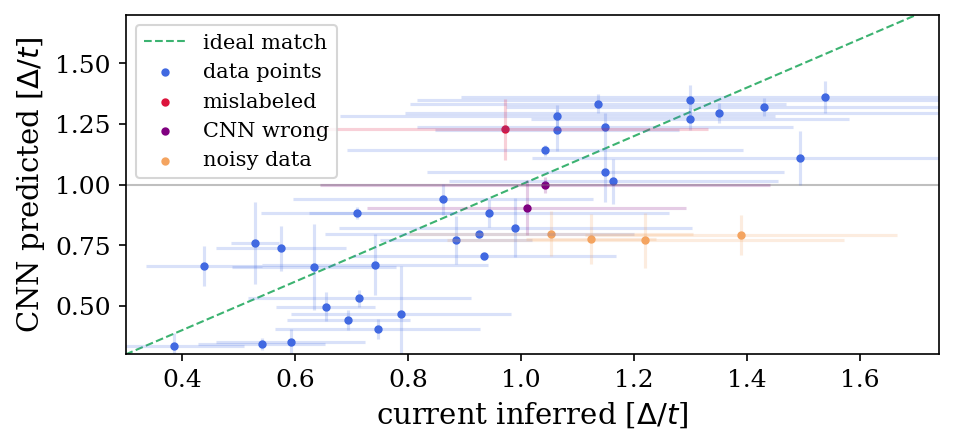

In [6]:
# import data - Zeeman field = 100 mT
data_cGAN = np.loadtxt('results/CNN_100mT', delimiter='\t')

# data
x = data_cGAN[:,3]
y = data_cGAN[:,1]

# errors
yerr1 = data_cGAN[:,0]
xerr1 = data_cGAN[:,4] 

x_grid = np.linspace(0.3,1.7,100)
fig, ax = plt.subplots(dpi=150,figsize=[7,3])
ax = plt.gca() 
ax.plot(x_grid,x_grid, color='mediumseagreen', lw=1.0, ls="--", label = 'ideal match')
ax.axhline(y=1,color='grey', lw=1.,alpha=0.5)#, label='sweet spot')
ax.errorbar(x[0:33], y[0:33], marker='.', xerr = xerr1[:33]  , yerr = yerr1[:33], fmt='None', color='royalblue', ecolor='royalblue', alpha=0.2)
ax.scatter(x[0:33], y[0:33], marker=".", color="royalblue", label="data points")
ax.errorbar(x[33:34], y[33:34], marker='.', xerr = xerr1[33:34]  , yerr = yerr1[33:34], fmt='None', color='crimson', ecolor='crimson', alpha=0.2)
ax.scatter(x[33:34], y[33:34], marker=".", color="crimson", label="mislabeled")
ax.errorbar(x[34:36], y[34:36], marker='.', xerr = xerr1[34:36]  , yerr = yerr1[34:36], fmt='None', color='purple', ecolor='purple', alpha=0.2)
ax.scatter(x[34:36], y[34:36], marker=".", color="purple", label="CNN wrong")
ax.errorbar(x[36:], y[36:], marker='.', xerr = xerr1[36:]  , yerr = yerr1[36:], fmt='None', color='sandybrown', ecolor='sandybrown', alpha=0.2)
ax.scatter(x[36:], y[36:], marker=".", color="sandybrown", label="noisy data")
plt.legend()
ax.set_xlabel('current inferred [$\Delta / t$]')
ax.set_ylabel('CNN predicted [$\Delta / t$]')
ax.set_xlim(0.3,1.74)
ax.set_ylim(0.3,1.7)
plt.show()

## Plot predictions for simulated test set (Figure 3)

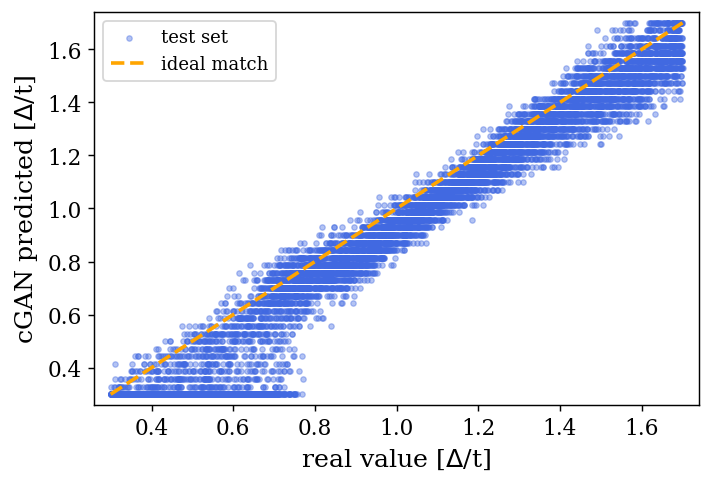

In [7]:
orig_test_set = np.load('results/simulation_testset.npy')
pred_test_set = np.load('results/simulation_predictions.npy')

error_test = np.mean( orig_test_set - pred_test_set)

x = np.linspace(0.3,1.7,10)
y = x

fig = plt.figure(dpi=130, figsize=[6,4])
plt.scatter(orig_test_set, pred_test_set, marker=".", lw=0.7, label='test set', color='royalblue', alpha=0.4)
plt.plot(x,y, color='orange', lw=2., ls="--", label="ideal match")
plt.xlabel("real value [$\Delta$/t]")
plt.ylabel("cGAN predicted [$\Delta$/t]")
plt.ylim(0.26,1.74)
plt.xlim(0.26,1.74)
plt.legend()
plt.show()